In [1]:
%pylab inline
import numpy as np

import seaborn as sns
import glob2
import pandas as pd
import h5py
from scipy.ndimage.filters import gaussian_filter
import natsort


Populating the interactive namespace from numpy and matplotlib


In [8]:
def get_dataframe():
    file_ = '../Examples/output/tect_model_data.npz'
    out = np.load(file_)
    d = dict(out)
    df = pd.DataFrame.from_dict(d)
    return df 

In [9]:
df = get_dataframe( )


In [10]:
df.head(2), df.shape

(     (1, 1)    (1, 2)    (2, 3)    (3, 3)  stepAtSave  timeAtSave
 0 -0.862069 -0.600000  0.200000  0.862069           0    0.000000
 1 -0.862069 -0.599411  0.215582  0.862069           5    0.000001, (99, 6))

In [11]:
velScale = 3.4482758620689656e-13*(3600*24*365)*100.  #cm/y
timeScale = 8.41e+18/(1e6*3600*24*365)    

In [12]:
df.columns

Index([u'(1, 1)', u'(1, 2)', u'(2, 3)', u'(3, 3)', u'stepAtSave',
       u'timeAtSave'],
      dtype='object')

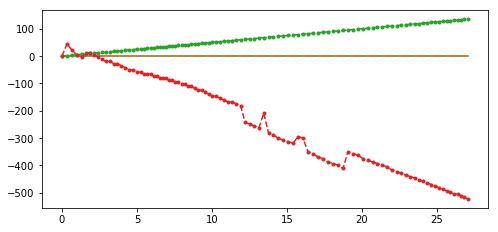

In [13]:
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(211)


ax.plot(df['timeAtSave']*timeScale, df['(1, 1)']*2900 - df['(1, 1)'][0]*2900, 
       label  = '', ls = '-')


ax.plot(df['timeAtSave']*timeScale, df['(3, 3)']*2900 - df['(3, 3)'][0]*2900, 
  label  = '', ls = '--')

ax.plot(df['timeAtSave']*timeScale, df['(1, 2)']*2900 - df['(1, 2)'][0]*2900, 
marker='.',label  = '', ls = '--')

ax.plot(df['timeAtSave']*timeScale, df['(2, 3)']*2900 - df['(2, 3)'][0]*2900, 
        marker='.',label  = '', ls = '--')

## Surface vels

In [14]:
def listify_data(unique_string, path):
    glob_str = path + '*' + unique_string + '*'
    files = natsort.natsort(glob2.glob(glob_str))
    #print(glob_str)
    #return files
    
    dataList = []
    for f in files:
        with h5py.File(f,'r') as hf:
            data = hf.get('data')
            dataList.append(np.array(data))
    return dataList

In [15]:
vx = listify_data('surfVx', '../Examples/output/files/')

(0, 400)

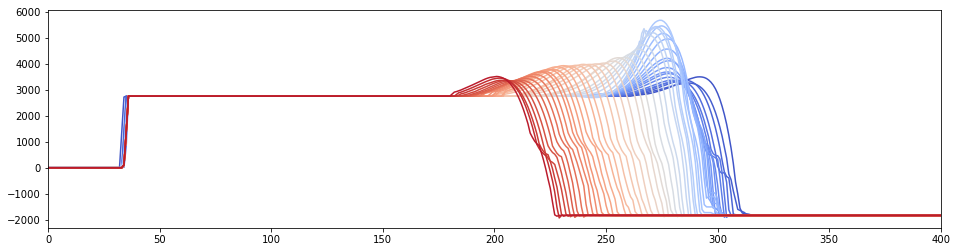

In [18]:
cs = sns.color_palette("coolwarm", len(vx[0::1]))

fig, ax = plt.subplots(figsize=(16,4))
ci = 0
for v in vx[0::1]:
    ax.plot(np.arange(len(v)), v, c = cs[ci])
    ci += 1
ax.set_xlim(0, 400)
#ax.hlines(0, )